## **D. Soustavy se silným tlumením (stiff soustavy)**

1. Defenice

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def f_1(u,v):
    return 998.0*u + 1998.0*v

def f_2(u,v):
    return -999.0*u - 1999.0*v

In [31]:
def RK4(u,v,h):
    funkce = [f_1, f_2]

    k_1 = [h * f(u,v) for f in funkce]
    k_2 = [h * f(u + h*k_1[0]/2.0, v + h*k_1[1]/2.0)for f in funkce]
    k_3 = [h * f(u + h*k_2[0]/2.0, v + h*k_2[1]/2.0)for f in funkce]
    k_4 = [h * f(u + h*k_3[0], v + h*k_3[1]) for f in funkce]

    u_v = [pes + (1.0/6.0) * (k_1[i] + 2.0*k_2[i] + 2.0*k_3[i] + k_4[i]) for i, pes in enumerate([u, v])]
    u,v = u_v
    
    return u, v

2. P.p a vypocet

In [32]:
x_0, x0 = 0.0, 0.0
u_0, v_0 = 1.0, 0.0
h = 0.001
x_max = 5.0

RK_fu, RK_fv = [u_0], [v_0]

while x0<x_max:
    u_0, v_0 = RK4(u_0, v_0, h)
    RK_fu.append(u_0)
    RK_fv.append(v_0)
    x0+= h

3. Zobraz vysledku

In [33]:
plt.rcParams.update({'font.size': 20})

In [34]:
def zobrazit_vysledky(nazvy_grafu, x, f_1, f_2, nazvy_os):
    xlabel = "X"
    ylabel = "Y"
    
    if len(f_1) != len(x):
        f_1 = f_1[:-1]
        f_2 = f_2[:-1]
    
    fig, axs = plt.subplots(2, figsize = (15,20))
    
    for ax, nazev_grafu, y_data, nazev_osy in zip(axs, nazvy_grafu, [f_1, f_2], nazvy_os):
        ax.plot(x,y_data, label = nazev_osy)
        ax.set_title(nazev_grafu)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend()
        
plt.show()

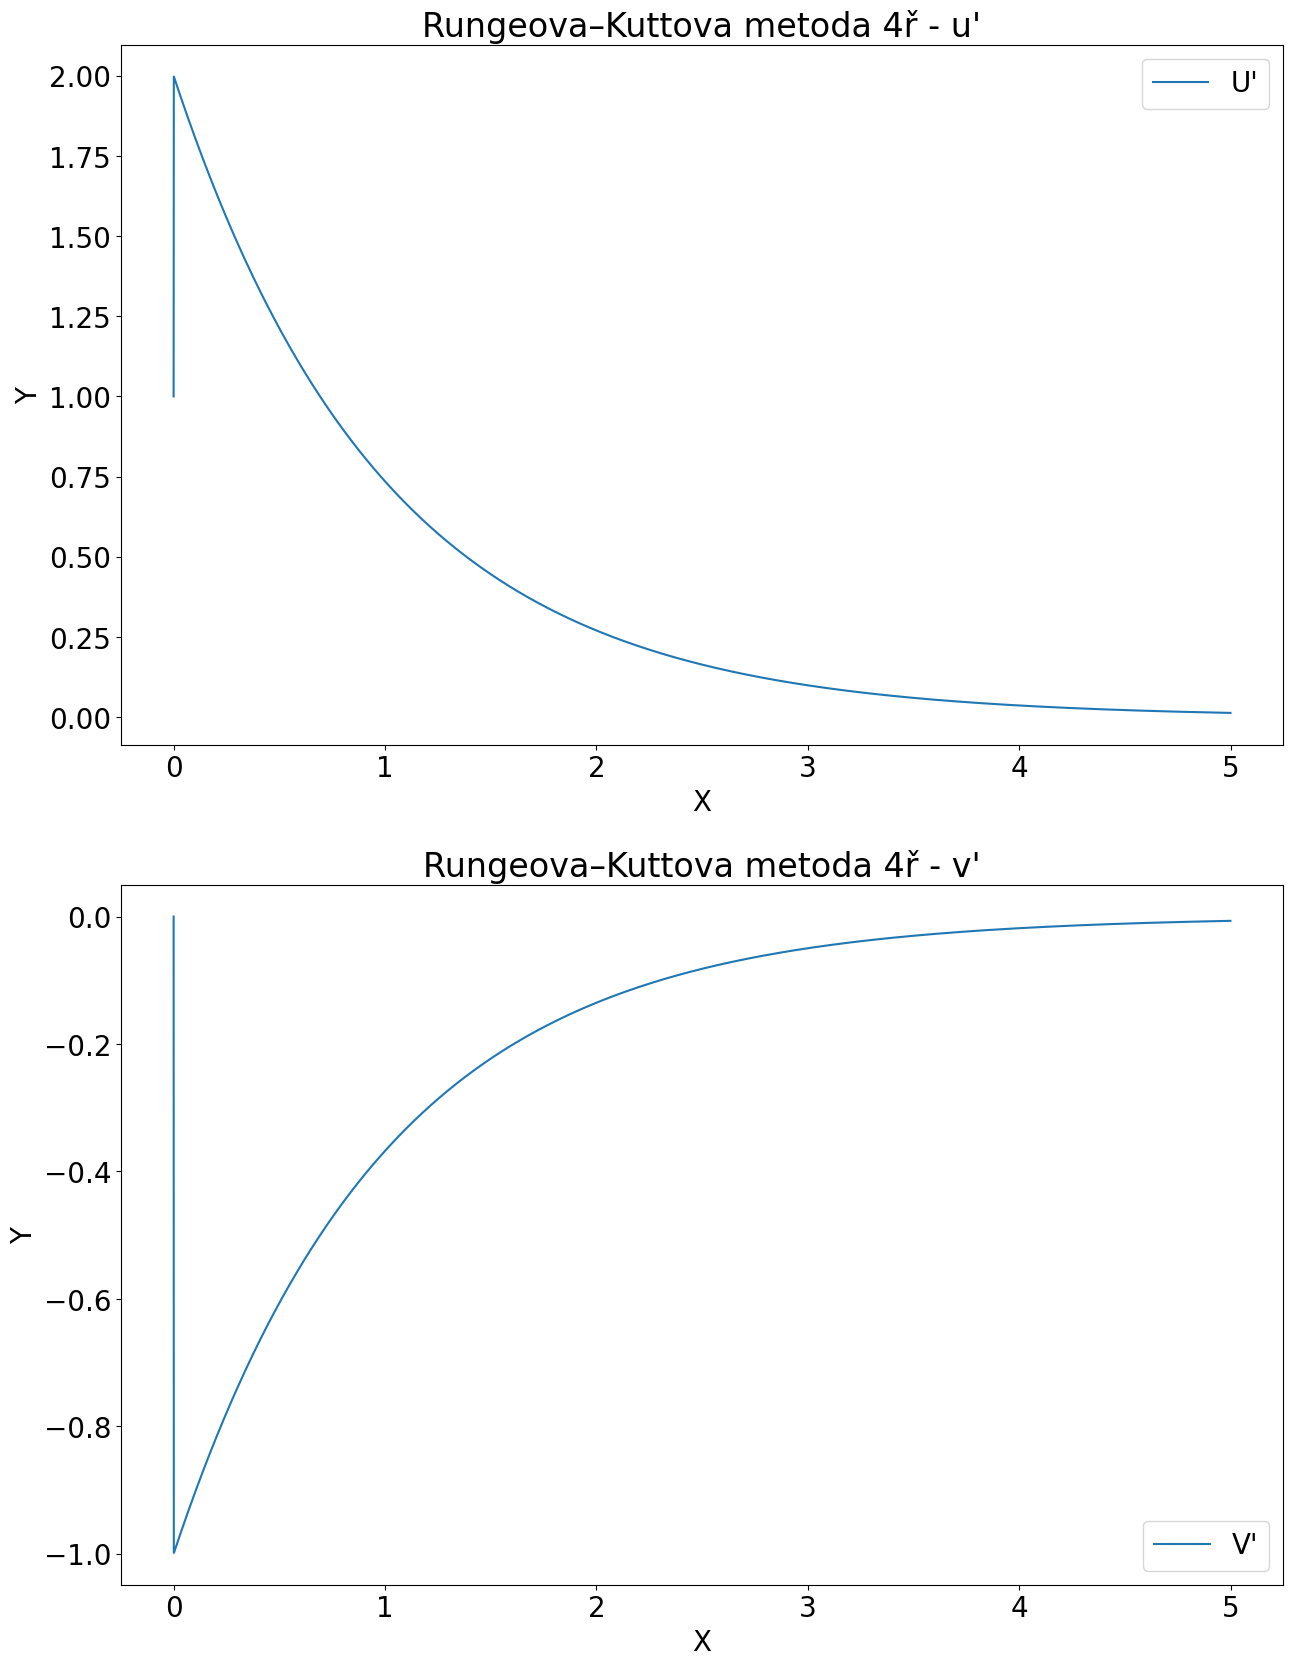

In [35]:
x = np.arange(x_0, x_max, h)

nazvy_grafu = ["Rungeova–Kuttova metoda 4ř - u'", "Rungeova–Kuttova metoda 4ř - v'"]
nazvy_os = [ "U'", "V'"]
zobrazit_vysledky(nazvy_grafu, x, RK_fu, RK_fv, nazvy_os)

## Eulerovou implicitní metodou 

In [36]:
def impl_Euler(u,v,h):
    I = np.array([[1. , 0.],
                  [0. , 1.] ])

    J = np.array([[998. , 1998.  ],
                  [-999 , -1999. ]])

    A = I - h * J
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    
    inv_matice = np.array([ [A[1][1] / det, -A[0][1]/det],
                            [-A[1][0] / det, A[0][0] / det]])
    
    
    new_u = inv_matice[0][0] * u + inv_matice[0][1] * v
    new_v = inv_matice[1][0] * u + inv_matice[1][1] * v
    
    return new_u, new_v

u, v = 1., 0.
h = 0.001
x_0, x0 = 0., 0.
x_max = 5.

EU_fu, EU_fv = [u], [v]

while x0 < x_max:
    u, v = impl_Euler(u , v, h)
    x0+= h 
    
    EU_fu.append(u)
    EU_fv.append(v)

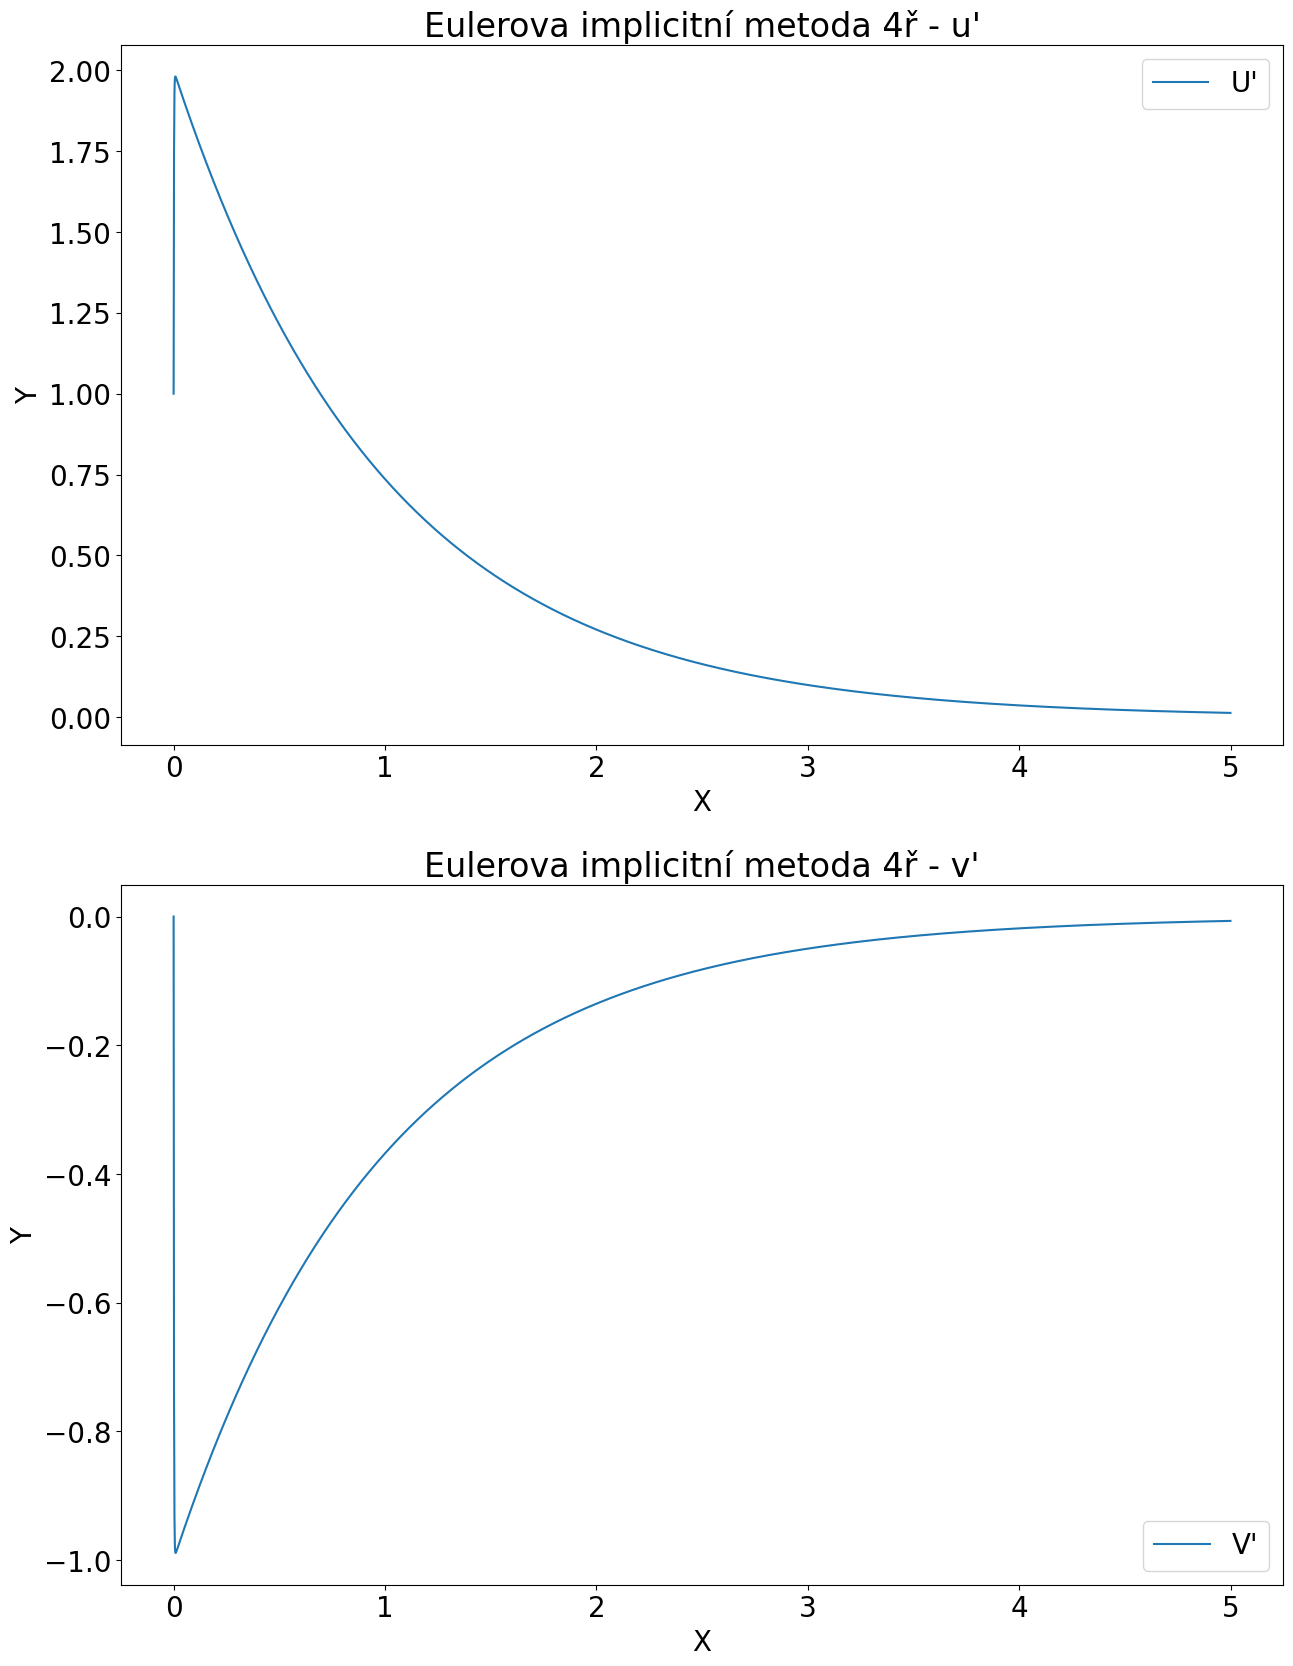

In [37]:
nazvy_grafu = ["Eulerova implicitní metoda 4ř - u'", "Eulerova implicitní metoda 4ř - v'"]
nazvy_os = [ "U'", "V'"]
zobrazit_vysledky(nazvy_grafu, x, EU_fu, EU_fv, nazvy_os)

## Analytické řešení

In [38]:
u = [2 * np.exp(-x_n) - np.exp(- 1000.0*x_n) for x_n in x]
v = [ - np.exp(-x_n) + np.exp(- 1000.0*x_n) for x_n in x]

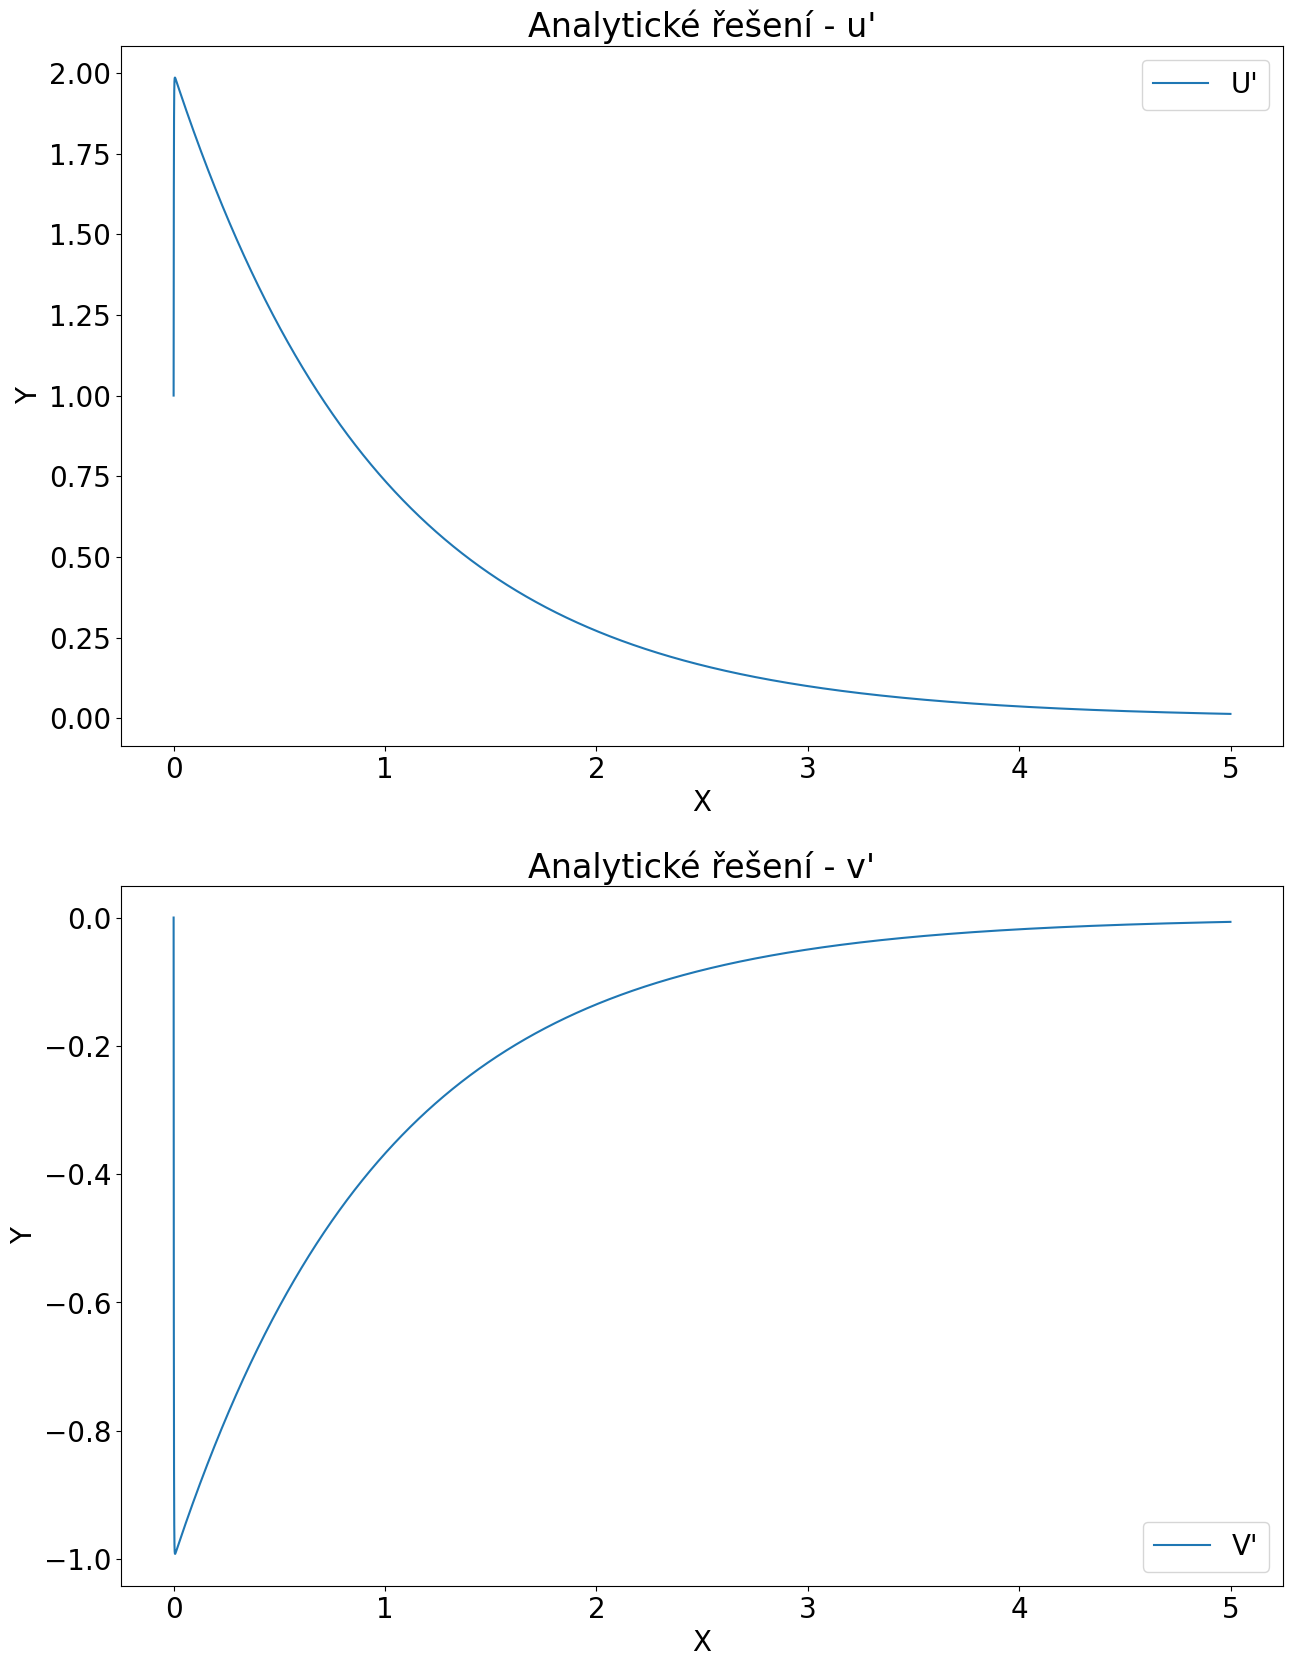

In [39]:
nazvy_grafu = ["Analytické řešení - u'", "Analytické řešení - v'"]
nazvy_os = [ "U'", "V'"]
zobrazit_vysledky(nazvy_grafu, x, u, v, nazvy_os)

## Globální diskretizační chyba

In [40]:
def plot_GDC(a_1, a_2, RK_1, RK_2, nazvy_grafu):
    
    gdc_1 = np.abs(np.array(a_1) - np.array(RK_1[:-1]))
    gdc_2 = np.abs(np.array(a_2) - np.array(RK_2[:-1]))    

    x_label = "Iterace"
    y_label = "Chyba"
    
    fig, axs = plt.subplots(2, figsize = (15,20))
    
    for ax, nazvev_grafu, chyba in zip(axs, nazvy_grafu, [gdc_1, gdc_2]):
        ax.plot(chyba[20:])
        ax.set_title(nazvev_grafu)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)

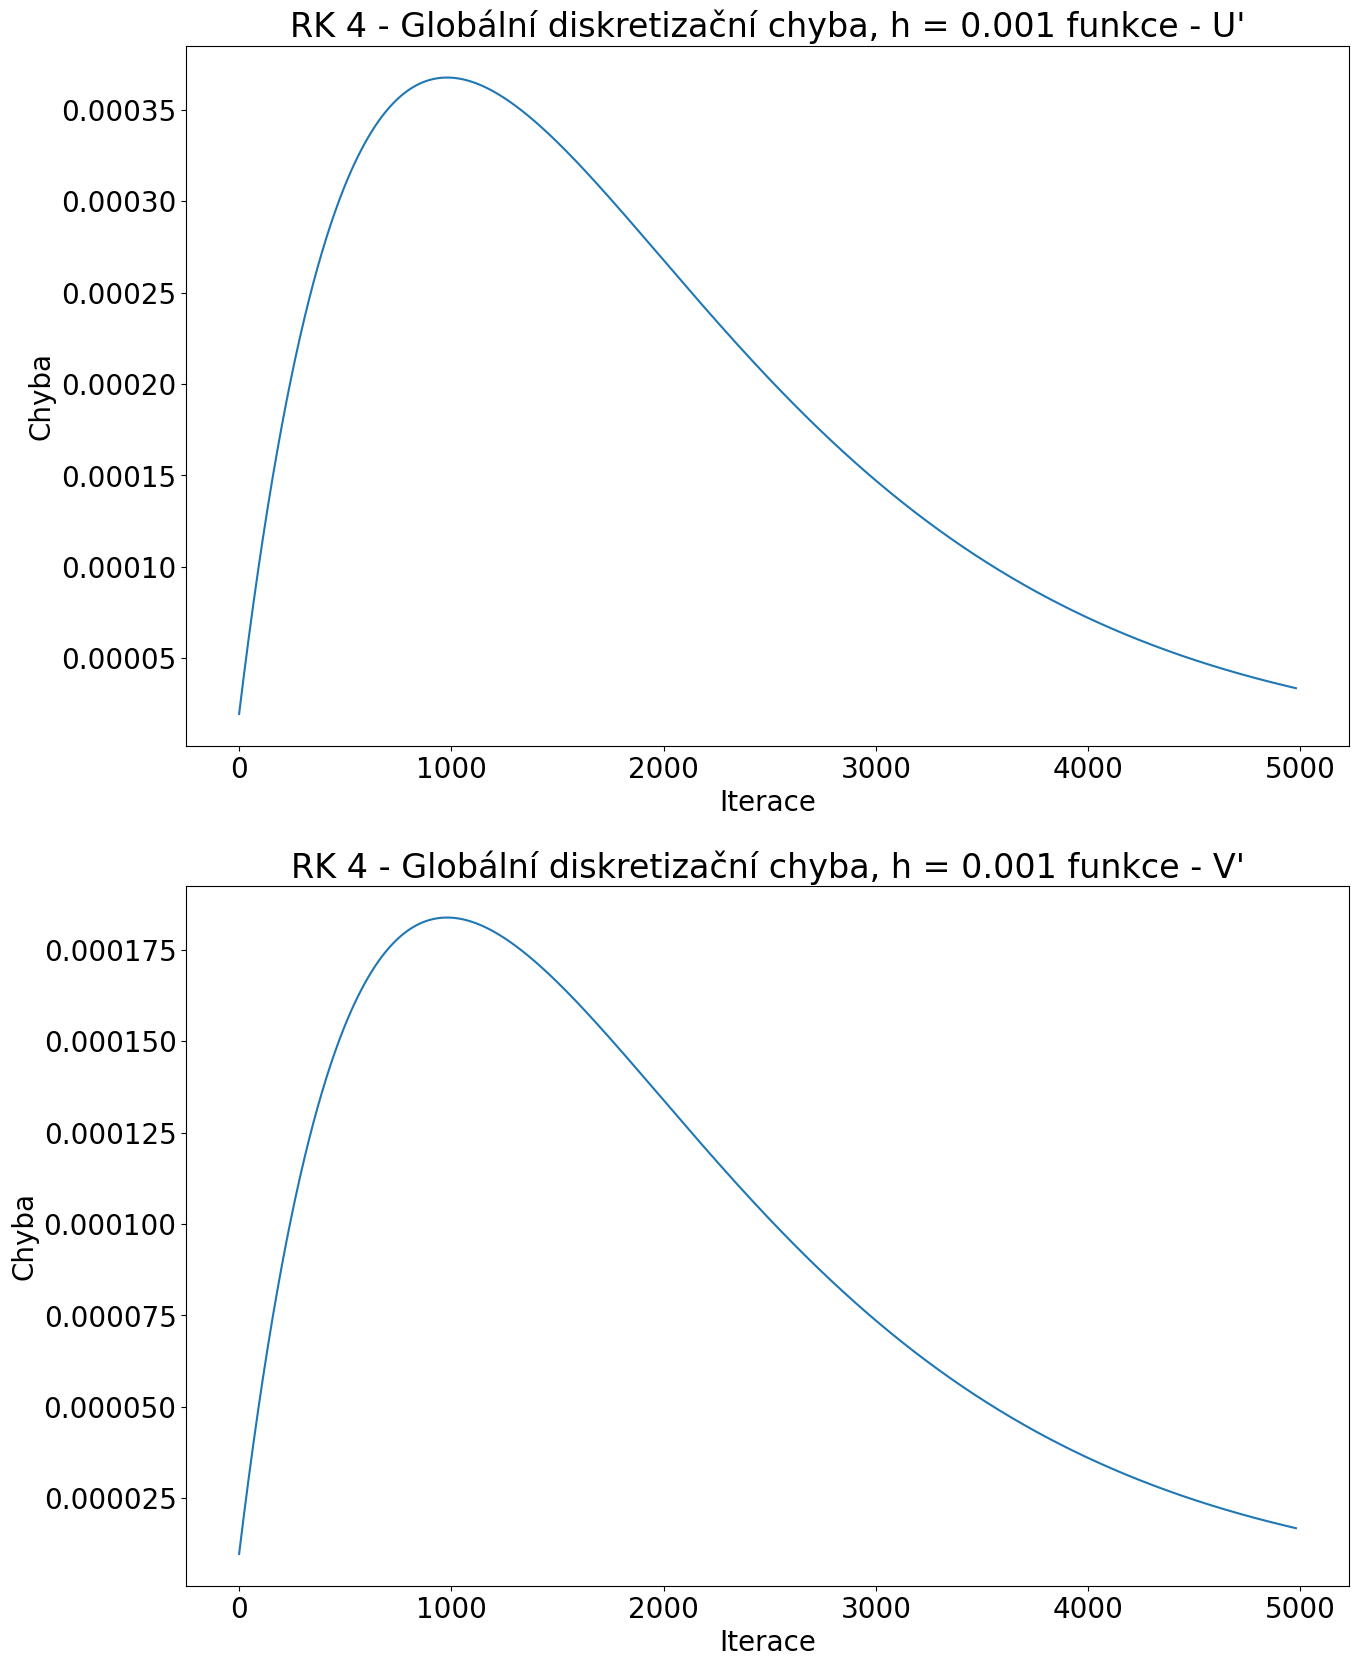

In [41]:
nazvy_grafu = [f"RK 4 - Globální diskretizační chyba, h = {h} funkce - {f}" for f in ["U'", "V'"]]
plot_GDC(u, v, RK_fu, RK_fv,nazvy_grafu)

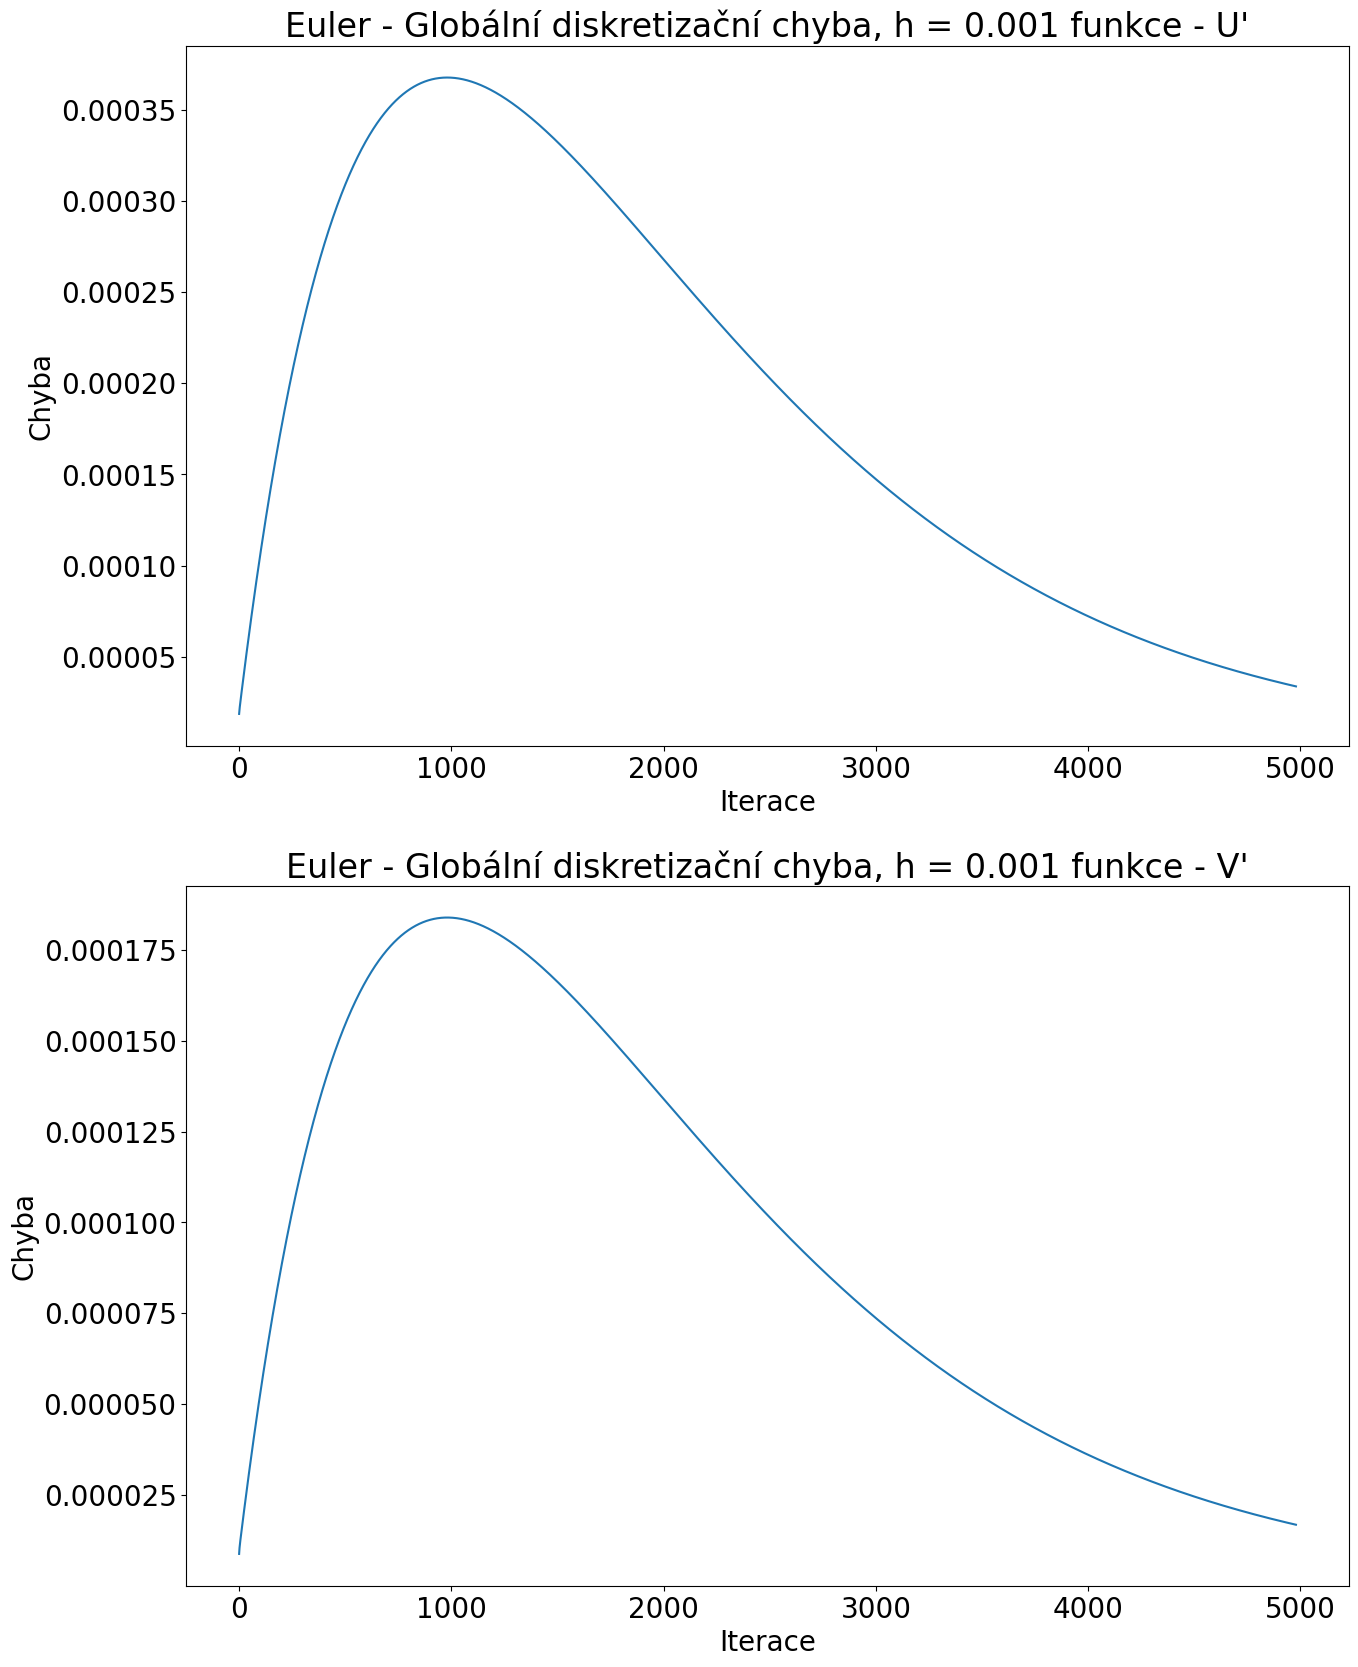

In [42]:
nazvy_grafu = [f"Euler - Globální diskretizační chyba, h = {h} funkce - {f}" for f in ["U'", "V'"]]
plot_GDC(u, v, EU_fu, EU_fv,nazvy_grafu)